In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as  plt
import matplotlib.cm as cm

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

In [2]:
np.random.seed(20220421)

In [3]:
content_tfidf_texto=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\tfidf_final.pkl','rb'))

In [4]:
pdfs_limpios_stemm=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\pdfs_limpios_stemm_final.pkl','rb'))

In [5]:
pdfs_limpios_1=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\pdfs_limpios.pkl','rb'))
pdfs_limpios_2=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\pdfs_limpios_epn_amlo.pkl','rb'))

pdfs_limpios=pdfs_limpios_1+pdfs_limpios_2

In [8]:
#kmeans_results = []

#grupos = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]

#for element in grupos:
    #kmeans = KMeans(n_clusters=element, max_iter=100)
    #kmeans_results.append(kmeans.fit(content_tfidf_texto))
    

In [9]:
#carga modelo kmeans
grupos = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
kmeans_results=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\kmeans_tfidf_informes_final.pkl','rb'))

In [10]:
sses = [element.inertia_ for element in kmeans_results]

sse = pd.DataFrame({'grupos': grupos, 
                  'sse': sses})

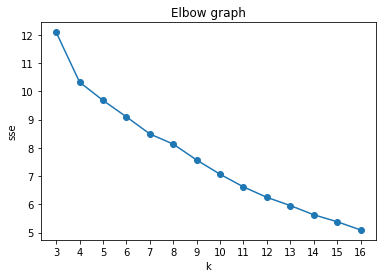

In [11]:
plt.clf()
plt.plot(sse.grupos, sse.sse)
plt.scatter(sse.grupos, sse.sse)
plt.xticks(grupos)
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow graph")
plt.show()

## Silhouette

In [12]:
scaler = MinMaxScaler()

In [13]:
k = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [14]:
range_n_clusters = k

In [15]:
content_tfidf_texto.toarray()

array([[0.44583592, 0.04575102, 0.04381642, ..., 0.05402477, 0.0771169 ,
        0.05959033],
       [0.00737591, 0.00249333, 0.0422181 , ..., 0.04142234, 0.09742638,
        0.03409923],
       [0.        , 0.        , 0.02893743, ..., 0.04357383, 0.14227571,
        0.09886956],
       ...,
       [0.        , 0.        , 0.05444893, ..., 0.03617158, 0.06806117,
        0.08847952],
       [0.        , 0.        , 0.01508909, ..., 0.        , 0.09053454,
        0.04526727],
       [0.        , 0.        , 0.0279025 , ..., 0.02965796, 0.07440667,
        0.04650417]])

For n_clusters = 3 The average silhouette_score is : 0.3012422238384119


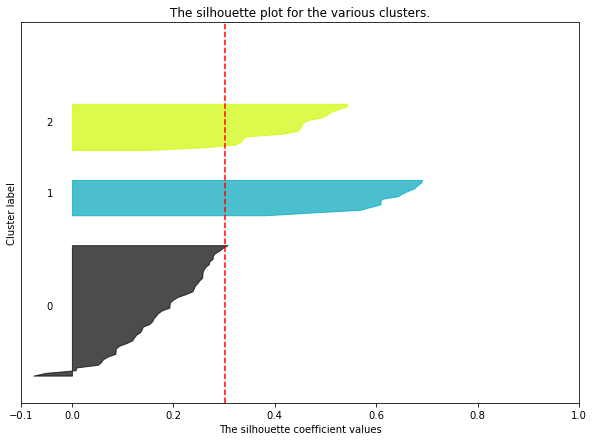

For n_clusters = 4 The average silhouette_score is : 0.28019275456023074


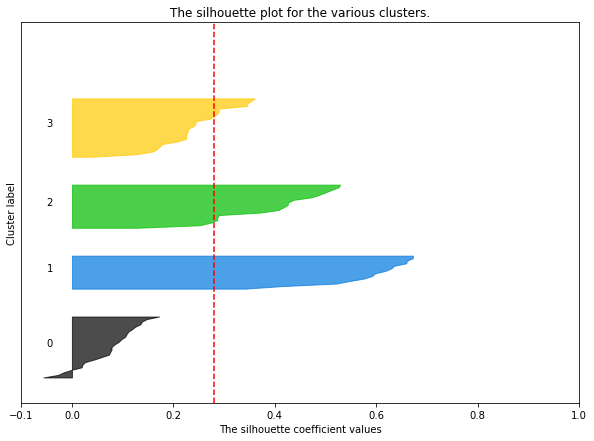

For n_clusters = 5 The average silhouette_score is : 0.2586092876846428


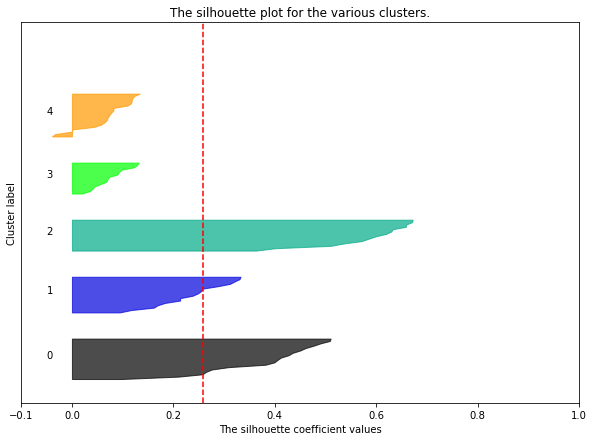

For n_clusters = 6 The average silhouette_score is : 0.2347268841629025


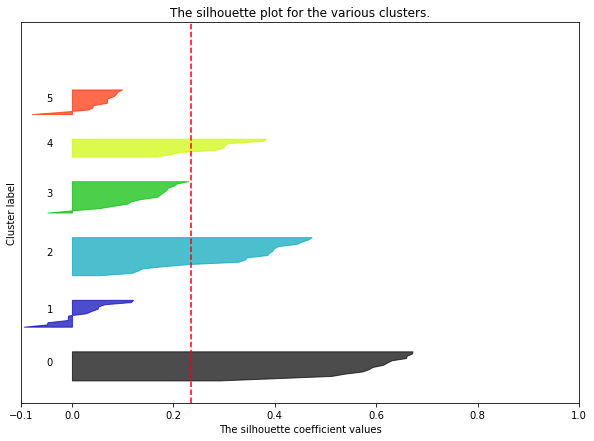

For n_clusters = 7 The average silhouette_score is : 0.23274025651603555


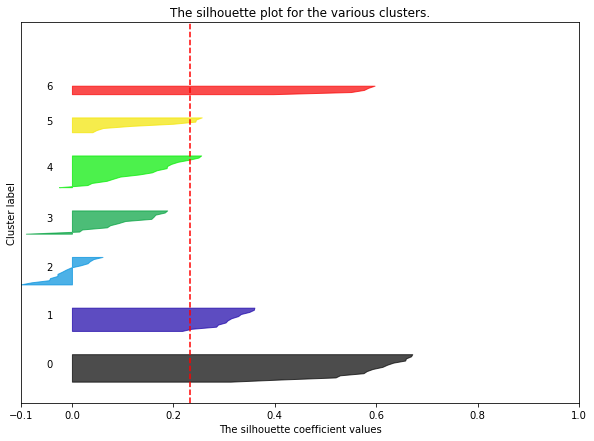

For n_clusters = 8 The average silhouette_score is : 0.24744347681477094


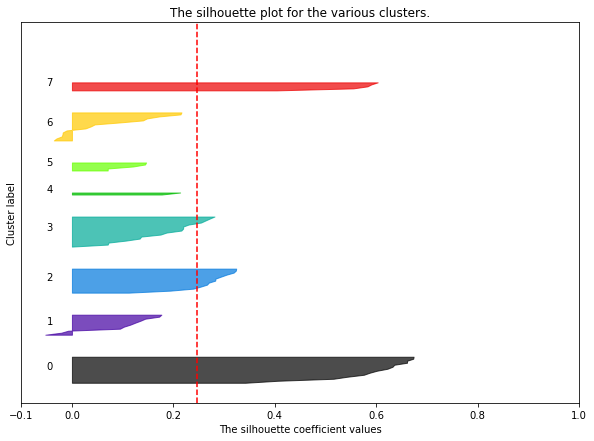

For n_clusters = 9 The average silhouette_score is : 0.2508025250865328


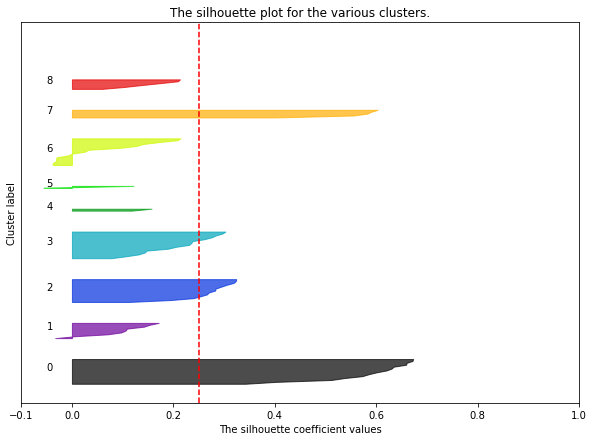

For n_clusters = 10 The average silhouette_score is : 0.25231385230062237


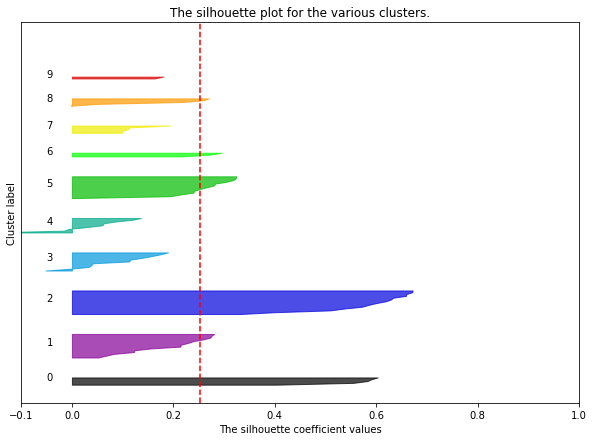

For n_clusters = 11 The average silhouette_score is : 0.23968214162890647


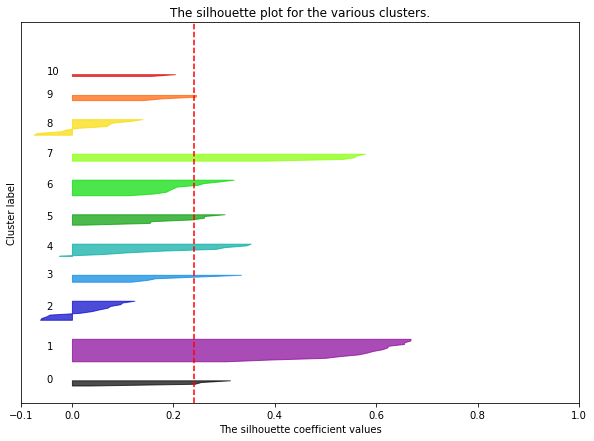

For n_clusters = 12 The average silhouette_score is : 0.26711767391871855


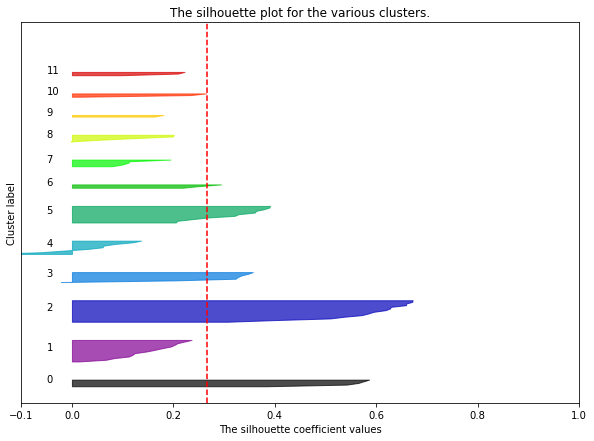

For n_clusters = 13 The average silhouette_score is : 0.2720189812253309


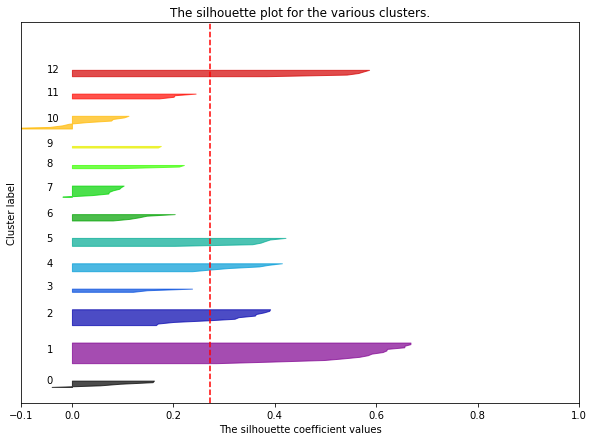

For n_clusters = 14 The average silhouette_score is : 0.2729575997082413


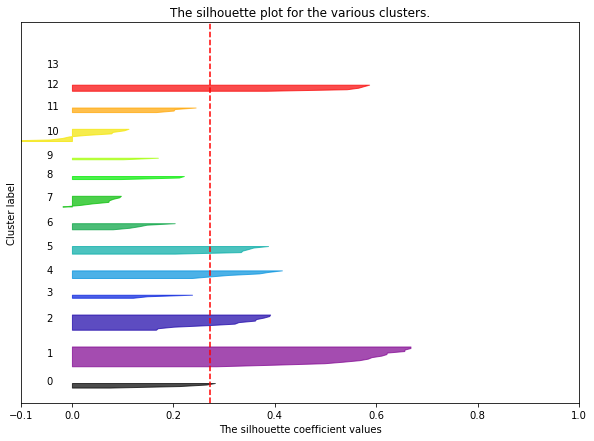

For n_clusters = 15 The average silhouette_score is : 0.27018558015502986


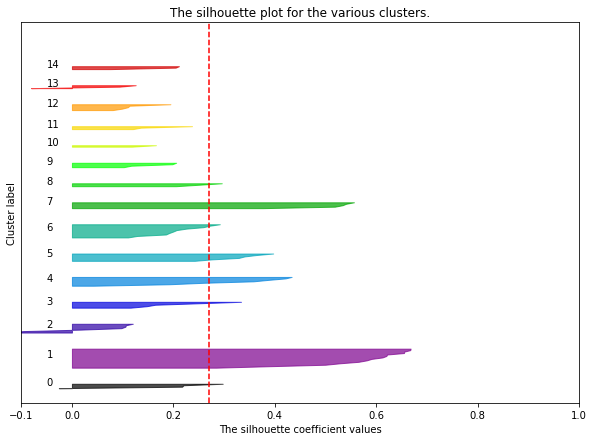

For n_clusters = 16 The average silhouette_score is : 0.27010422312810545


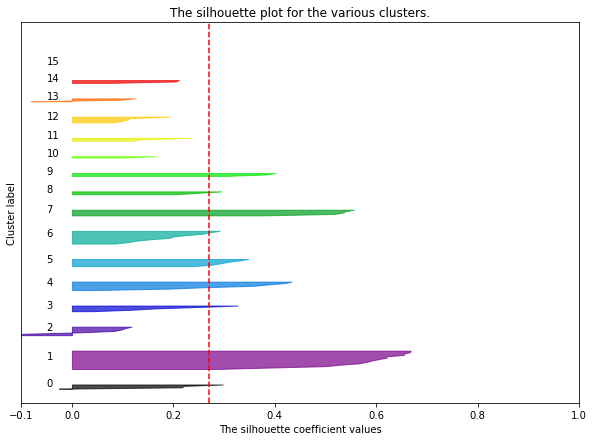

In [16]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, content_tfidf_texto.shape[1] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, max_iter=10, random_state=10)
    cluster_labels = clusterer.fit_predict(content_tfidf_texto)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(content_tfidf_texto, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(content_tfidf_texto, cluster_labels)



    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()


In [17]:
n_grupos = 4

In [18]:
kmeans_tfidf = kmeans_results[grupos.index(n_grupos)]

In [19]:
kmeans_labels = kmeans_tfidf.labels_

In [20]:
df=pd.DataFrame({'documentos': pdfs_limpios_stemm,'grupo':kmeans_labels})

In [21]:
df.documentos

0     inform gobiern president manuel avil camach se...
1     inform gobiern president manuel avil camach se...
2     inform gobiern president manuel avil camach se...
3     inform gobiern president manuel avil camach se...
4     inform gobiern president manuel avil camach se...
                            ...                        
76    president republ epn fech publicacion septiemb...
77    president republ epn fech publicacion septiemb...
78    president republ septiembr president andres ma...
79    president republ fech publicacion septiembr ca...
80    president republ septiembr terc inform moder d...
Name: documentos, Length: 81, dtype: object

In [22]:
df.shape

(81, 2)

In [23]:
df.groupby('grupo',as_index=False).count()

,grupo,documentos
0,0,24
1,1,18
2,2,14
3,3,25


In [24]:
kmeans_tfidf.n_iter_

3

## Descripción de grupos

In [25]:
from itertools import repeat

In [26]:
auxiliar=['avila camacho','aleman valdes','ruiz cortines','lopez mateos','diaz ordaz','echeverria alvarez','lopez portillo'
          ,'de la madrid','salinas de gortari','zedillo ponce de leon','fox quesada','calderon hinojosa', 'pena nieto']

In [27]:
presidentes=[]

for i in range(len(auxiliar)):
    presidentes.extend(repeat(auxiliar[i],6))

presidentes.extend(repeat('lopez obrador',3))

In [28]:
len(presidentes)

81

In [29]:
data=pd.DataFrame({'year':range(1941,2022),'presidente': presidentes,'grupo':kmeans_labels})

In [30]:
for i in range(0,82):
    data['year']=data['year'].astype('category')

In [31]:
for i in range(0,82):
    data['grupo']=data['grupo'].astype('category')

In [32]:
data.groupby('grupo').describe()

year                   presidente                               
      count unique   top freq      count unique                top freq
grupo                                                                  
0        24     24  1981    1         24      5       de la madrid    6
1        18     18  2021    1         18      4      aleman valdes    6
2        14     14  1941    1         14      4       lopez mateos    6
3        25     25  1995    1         25      6  calderon hinojosa    6

In [33]:
data[data.grupo==0]

,year,presidente,grupo
30,1971,echeverria alvarez,0
31,1972,echeverria alvarez,0
32,1973,echeverria alvarez,0
33,1974,echeverria alvarez,0
34,1975,echeverria alvarez,0
35,1976,echeverria alvarez,0
36,1977,lopez portillo,0
37,1978,lopez portillo,0
38,1979,lopez portillo,0
39,1980,lopez portillo,0


In [34]:
data[data.grupo==1]

,year,presidente,grupo
1,1942,avila camacho,1
2,1943,avila camacho,1
3,1944,avila camacho,1
4,1945,avila camacho,1
5,1946,avila camacho,1
6,1947,aleman valdes,1
7,1948,aleman valdes,1
8,1949,aleman valdes,1
9,1950,aleman valdes,1
10,1951,aleman valdes,1


In [35]:
data[data.grupo==2]

,year,presidente,grupo
0,1941,avila camacho,2
12,1953,ruiz cortines,2
18,1959,lopez mateos,2
19,1960,lopez mateos,2
20,1961,lopez mateos,2
21,1962,lopez mateos,2
22,1963,lopez mateos,2
23,1964,lopez mateos,2
24,1965,diaz ordaz,2
25,1966,diaz ordaz,2


In [36]:
data[data.grupo==3]

,year,presidente,grupo
52,1993,salinas de gortari,3
53,1994,salinas de gortari,3
54,1995,zedillo ponce de leon,3
55,1996,zedillo ponce de leon,3
56,1997,zedillo ponce de leon,3
57,1998,zedillo ponce de leon,3
58,1999,zedillo ponce de leon,3
59,2000,zedillo ponce de leon,3
60,2001,fox quesada,3
61,2002,fox quesada,3


#### Word Cloud

In [37]:
def generate_wordcloud(grupo, df, column):
    """Generates a wordcloud from a particular column"""
    df_grupo = df[df.grupo == grupo]
    wc_i = wc.generate(' '.join(df_grupo[column]))
    wc.to_file("wc_" + str(grupo) + "_" + column + ".png")
    plt.clf()
    plt.figure()
    plt.imshow(wc_i, interpolation="bilinear")
    plt.axis("off")
    plt.title("grupo " + str(grupo))
    plt.show()

In [38]:
wc = WordCloud(background_color="white")

<Figure size 432x288 with 0 Axes>

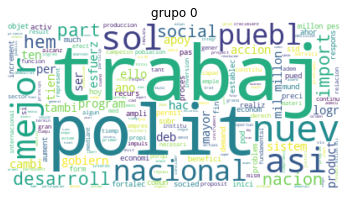

<Figure size 432x288 with 0 Axes>

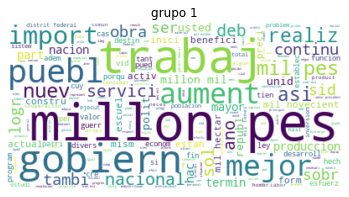

<Figure size 432x288 with 0 Axes>

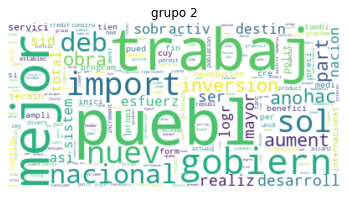

<Figure size 432x288 with 0 Axes>

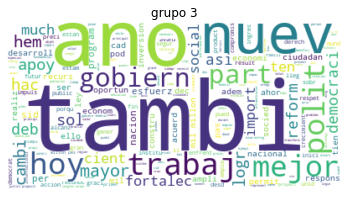

In [39]:
for element in range(n_grupos):
    generate_wordcloud(element, df, 'documentos')

## TSNE
borrador

In [34]:
from nltk import SnowballStemmer
from nltk.tokenize import word_tokenize

def stemm_text(text):
    """
    Stemm text using nltk stemmer (Snowball) for spanish
    :param text:
    :return:
    """
    stemm_sp = SnowballStemmer('spanish')
    tokens = word_tokenize(text, "spanish")
    stems = [stemm_sp.stem(token) for token in tokens]
    return stems

In [90]:
grupo_0 = data[data.grupo == 3]

In [91]:
grupo_0.shape

(18, 3)

In [92]:
grupo_0

,year,presidente,grupo
52,1993,salinas de gortari,3
53,1994,salinas de gortari,3
54,1995,zedillo ponce de leon,3
55,1996,zedillo ponce de leon,3
56,1997,zedillo ponce de leon,3
57,1998,zedillo ponce de leon,3
58,1999,zedillo ponce de leon,3
60,2001,fox quesada,3
61,2002,fox quesada,3
62,2003,fox quesada,3


In [29]:
a=content_tfidf_texto.toarray().tolist()

In [30]:
a[64:66]

[[0.0,
  0.0,
  0.05721385341923625,
  0.01959381810409082,
  0.01907128447307875,
  0.0381425689461575,
  0.076285137892315,
  0.057992285201628704,
  0.09665380866938116,
  0.0,
  0.0,
  0.09535642236539375,
  0.228855413676945,
  0.076285137892315,
  0.0,
  0.1144277068384725,
  0.05721385341923625,
  0.0,
  0.0198605537035004,
  0.0,
  0.0,
  0.20978412920386627,
  0.1907128447307875,
  0.1144277068384725,
  0.0,
  0.01907128447307875,
  0.05721385341923625,
  0.0381425689461575,
  0.05721385341923625,
  0.0,
  0.0,
  0.019330761733876232,
  0.076285137892315,
  0.11598457040325741,
  0.038661523467752465,
  0.019330761733876232,
  0.3242118360423388,
  0.17164156025770877,
  0.1144277068384725,
  0.0381425689461575,
  0.0,
  0.0,
  0.0,
  0.0,
  0.01907128447307875,
  0.13349899131155127,
  0.17164156025770877,
  0.1144277068384725,
  0.1907128447307875,
  0.05721385341923625,
  0.13349899131155127,
  0.019330761733876232,
  0.0,
  0.09535642236539375,
  0.15464609387100986,
  0.1

In [35]:
tfidf_vect=pickle.load(open(r'C:\Users\HIDEv\OneDrive\Documentos\ArchivosTesis\tfidf_vect.pkl','rb'))

In [38]:
tfidf_vect.get_feature_names()

['$',
 '%',
 'accion',
 'activ',
 'ampli',
 'ano',
 'anos',
 'apoy',
 'asi',
 'aument',
 'benefici',
 'cad',
 'cambi',
 'capac',
 'cient',
 'com',
 'comun',
 'construccion',
 'continu',
 'cre',
 'credit',
 'deb',
 'derech',
 'desarroll',
 'dos',
 'durant',
 'econom',
 'economi',
 'educacion',
 'ello',
 'empres',
 'esfuerz',
 'federal',
 'fin',
 'form',
 'general',
 'gobiern',
 'hac',
 'hem',
 'import',
 'increment',
 'industri',
 'inici',
 'internacional',
 'inversion',
 'justici',
 'ley',
 'logr',
 'mayor',
 'medi',
 'mejor',
 'mil',
 'millon',
 'mism',
 'much',
 'nacion',
 'nacional',
 'nuev',
 'obras',
 'part',
 'pas',
 'per',
 'pes',
 'poblacion',
 'pod',
 'polit',
 'preci',
 'present',
 'primer',
 'problem',
 'produccion',
 'product',
 'program',
 'public',
 'puebl',
 'pued',
 'realiz',
 'recurs',
 'reform',
 'relacion',
 'republ',
 'sector',
 'segur',
 'ser',
 'servici',
 'si',
 'sid',
 'sistem',
 'sobr',
 'social',
 'sol',
 'tambi',
 'ten',
 'termin',
 'tien',
 'total',
 'trabaj

In [39]:
matriz = pd.DataFrame(content_tfidf_texto.toarray(),
                      columns=tfidf_vect.get_feature_names())

In [42]:
matriz.columns.values.tolist()

['$',
 '%',
 'accion',
 'activ',
 'ampli',
 'ano',
 'anos',
 'apoy',
 'asi',
 'aument',
 'benefici',
 'cad',
 'cambi',
 'capac',
 'cient',
 'com',
 'comun',
 'construccion',
 'continu',
 'cre',
 'credit',
 'deb',
 'derech',
 'desarroll',
 'dos',
 'durant',
 'econom',
 'economi',
 'educacion',
 'ello',
 'empres',
 'esfuerz',
 'federal',
 'fin',
 'form',
 'general',
 'gobiern',
 'hac',
 'hem',
 'import',
 'increment',
 'industri',
 'inici',
 'internacional',
 'inversion',
 'justici',
 'ley',
 'logr',
 'mayor',
 'medi',
 'mejor',
 'mil',
 'millon',
 'mism',
 'much',
 'nacion',
 'nacional',
 'nuev',
 'obras',
 'part',
 'pas',
 'per',
 'pes',
 'poblacion',
 'pod',
 'polit',
 'preci',
 'present',
 'primer',
 'problem',
 'produccion',
 'product',
 'program',
 'public',
 'puebl',
 'pued',
 'realiz',
 'recurs',
 'reform',
 'relacion',
 'republ',
 'sector',
 'segur',
 'ser',
 'servici',
 'si',
 'sid',
 'sistem',
 'sobr',
 'social',
 'sol',
 'tambi',
 'ten',
 'termin',
 'tien',
 'total',
 'trabaj

In [47]:
matriz[64:66]

,$,%,accion,activ,ampli,ano,anos,apoy,asi,aument,...,sol,tambi,ten,termin,tien,total,trabaj,ultim,unid,vid
64,0.0,0.0,0.057214,0.019594,0.019071,0.038143,0.076285,0.057992,0.096654,0.00000,...,0.114428,0.171642,0.152570,0.0,0.077323,0.0,0.038143,0.019861,0.038143,0.114428
65,0.0,0.0,0.043236,0.000000,0.043236,0.043236,0.129708,0.000000,0.000000,0.02221,...,0.064854,0.172944,0.043236,0.0,0.000000,0.0,0.086472,0.000000,0.108090,0.151326


In [59]:
np.array(matriz.iloc[64].tolist())

array([0.        , 0.        , 0.05721385, 0.01959382, 0.01907128,
       0.03814257, 0.07628514, 0.05799229, 0.09665381, 0.        ,
       0.        , 0.09535642, 0.22885541, 0.07628514, 0.        ,
       0.11442771, 0.05721385, 0.        , 0.01986055, 0.        ,
       0.        , 0.20978413, 0.19071284, 0.11442771, 0.        ,
       0.01907128, 0.05721385, 0.03814257, 0.05721385, 0.        ,
       0.        , 0.01933076, 0.07628514, 0.11598457, 0.03866152,
       0.01933076, 0.32421184, 0.17164156, 0.11442771, 0.03814257,
       0.        , 0.        , 0.        , 0.        , 0.01907128,
       0.13349899, 0.17164156, 0.11442771, 0.19071284, 0.05721385,
       0.13349899, 0.01933076, 0.        , 0.09535642, 0.15464609,
       0.15257028, 0.05721385, 0.09535642, 0.        , 0.07628514,
       0.07628514, 0.01907128, 0.01907128, 0.        , 0.20978413,
       0.26699798, 0.01907128, 0.07628514, 0.03866152, 0.07732305,
       0.        , 0.03814257, 0.        , 0.19071284, 0.05878

In [72]:
b=content_tfidf_texto.toarray()

In [77]:
b

array([[0.43020865, 0.04508946, 0.04428203, ..., 0.05349299, 0.07793637,
        0.06022356],
       [0.00705199, 0.00243471, 0.0422748 , ..., 0.04063786, 0.09755722,
        0.03414503],
       [0.        , 0.        , 0.0290318 , ..., 0.04283049, 0.14273967,
        0.09919197],
       ...,
       [0.        , 0.        , 0.06923332, ..., 0.01310883, 0.03776363,
        0.05664544],
       [0.        , 0.        , 0.03276875, ..., 0.02274993, 0.06007604,
        0.07099896],
       [0.        , 0.        , 0.02329318, ..., 0.        , 0.03882197,
        0.06987954]])

In [76]:
b[0,:]

array([0.43020865, 0.04508946, 0.04428203, 0.08553118, 0.05490971,
       0.13993121, 0.02125537, 0.01256766, 0.09515517, 0.10554912,
       0.04185569, 0.04428203, 0.02479794, 0.0283405 , 0.01714204,
       0.2816337 , 0.04782459, 0.06551325, 0.06271592, 0.08617827,
       0.05641418, 0.1505589 , 0.05845228, 0.06199484, 0.03821606,
       0.05136715, 0.09210662, 0.04782459, 0.0371969 , 0.02729719,
       0.02213503, 0.03949837, 0.11159071, 0.07899674, 0.04488451,
       0.08617827, 0.23203783, 0.10096302, 0.03896818, 0.12044712,
       0.03552451, 0.07910913, 0.0736106 , 0.058234  , 0.03365434,
       0.03188306, 0.13461737, 0.056681  , 0.09033534, 0.06730868,
       0.12398968, 0.06822446, 0.05745218, 0.09742046, 0.01615843,
       0.09033534, 0.26392089, 0.12576096, 0.13645422, 0.09033534,
       0.06199484, 0.06022356, 0.06376612, 0.04242548, 0.0655374 ,
       0.09564918, 0.04073947, 0.05845228, 0.05206604, 0.06642908,
       0.06822711, 0.05313843, 0.05277456, 0.14170249, 0.22929

In [98]:
c1 = b[52:59,:]

In [99]:
c2=b[60:64,:]

In [103]:
c=np.concatenate((c1,c2),axis=0)

In [104]:
c.shape

(11, 100)

In [102]:
c2.shape

(4, 100)

In [85]:
def tsne_plot_tfidf(labels, content_tfidf_texto):
    "Creates and TSNE model and plots it"
 
    tokens = []
    
    #arr = content_tfidf_texto.toarray()
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='random', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(content_tfidf_texto)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16, 16)) 
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

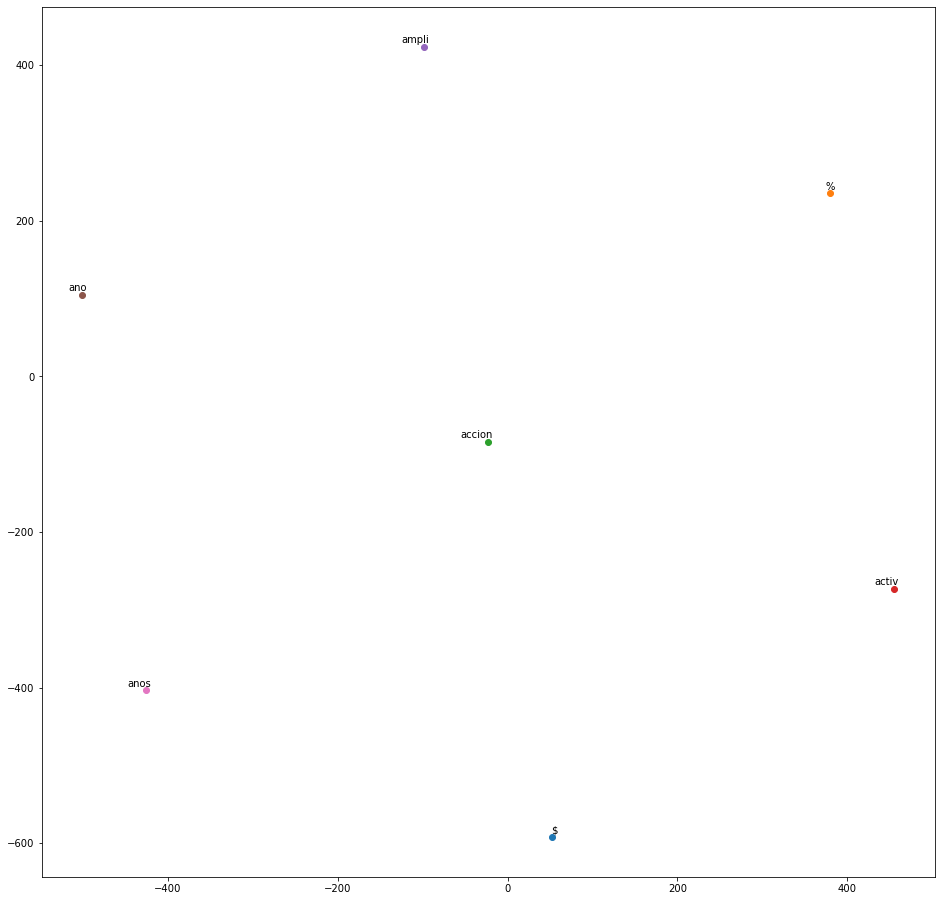

In [95]:
tsne_plot_tfidf(tfidf_vect.get_feature_names(), c)